In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

First we generate trajectories:

In [11]:
def generate_trajectory(N_timesteps=1000, num_states=4, p_rest=0.2):
    """We wish to simulate a mouse trajectory on a square track with four discrete states,
    for now corresponding to the four corners of the square."""
    trajectory = np.empty(N_timesteps, dtype=int)
    trajectory[0] = np.random.randint(num_states)
    for t in range(1, N_timesteps):
        if np.random.rand() < p_rest:
            trajectory[t] = trajectory[t - 1]
        else:
            trajectory[t] = np.random.randint(num_states)
    return trajectory

def one_hot_encode_trajectory(state, num_states=4):
    """Take a 1-D trajectory time series as input and return a one-hot encoded version."""
    one_hot_trajectory = np.zeros((len(state), num_states), dtype=int)
    for t, s in enumerate(state):
        one_hot_trajectory[t][s] = 1
    return one_hot_trajectory

Training function based on an input time-series:

In [ ]:
def train_hebbian(one_hot_trajectory, eta=0.1, gamma=0.01, mu=0.0):
    """
    Run Hebbian learning across the time series.
    - eta: equivalent to a learning rate of sorts
    - gamma: decay factor
    """
    W = np.random.randn(4, 4)*0.1  
    # Weight matrix (each row corresponds to a neuron, 
    # and each column to an input state)
    
    for x in one_hot_trajectory: # x = one-hot encoded input vector
        # x has 1 row and 4 columns (one-hot encoded)
        x = x.reshape(-1, 1) # Reshape to column vector for matrix multiplication
        y = np.dot(W, x) # Calculate output (y = W * x) using matrix multiplication

        delta_W = eta * np.outer(y, x) # update rule: delta_W = eta * y * x^T
        delta_W = delta_W - gamma*np.mean(delta_W, axis=0, keepdims=True) # set mu = 0 for no Lateral inhibition

        W += delta_W
    
    return W

# LMAO

Simulating the entire thing in one go:

In [13]:
# Parameters
N = 10000
eta = 0.1
gamma = 0.01

trajectory = generate_trajectory(N)
one_hot_trajectory = one_hot_encode_trajectory(trajectory)

W_final = train_hebbian(one_hot_trajectory, eta, gamma)

Visualisation:

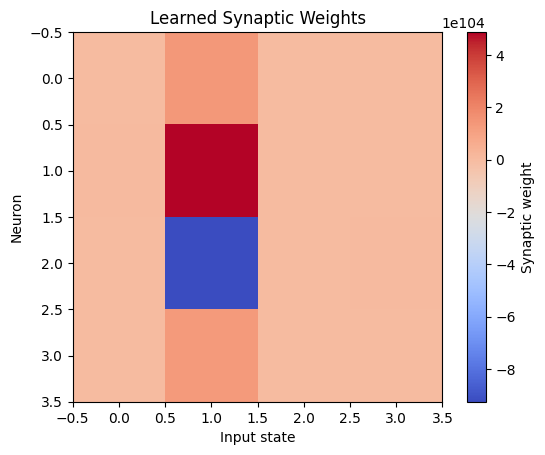

In [14]:
%matplotlib inline

plt.imshow(W_final, cmap='coolwarm')
plt.colorbar(label='Synaptic weight')
plt.xlabel('Input state')
plt.ylabel('Neuron')
plt.title('Learned Synaptic Weights')
plt.show()

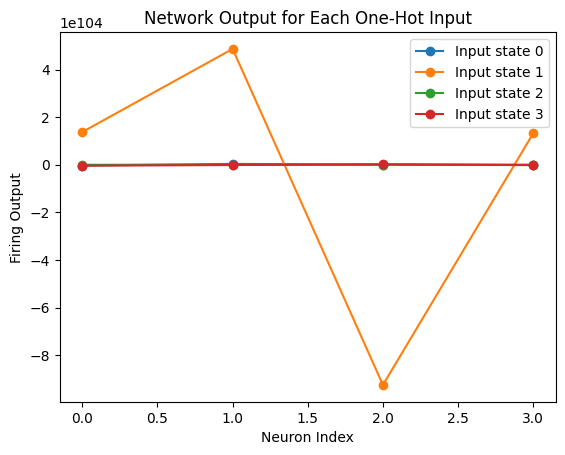

In [15]:
%matplotlib inline

x_vectors = one_hot_encode_trajectory([0, 1, 2, 3])
y_vectors = [np.dot(W_final, x) for x in x_vectors.T]

plt.figure()
for i, y in enumerate(y_vectors):
    plt.plot(y, marker='o', label=f'Input state {i}')
plt.xlabel('Neuron Index')
plt.ylabel('Firing Output')
plt.title('Network Output for Each One-Hot Input')
plt.legend()
plt.show()